In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Biomas.xlsx'  # Replace with the correct path to your file
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Display information about the dataframe
print(df.info())


   Number  Cellulose  Hemicellulose  Lignin   Temp  Pressure  \
0       1       0.46           0.29    0.25  665.0       1.0   
1       2       0.46           0.29    0.25  744.0       1.0   
2       3       0.46           0.29    0.25  811.0       1.0   
3       4       0.46           0.29    0.25  670.0       1.0   
4       5       0.46           0.29    0.25  750.0       1.0   

   Equivalance mass ratio  Steam to biomass mass ratio  \
0                    0.25                          0.0   
1                    0.30                          0.0   
2                    0.35                          0.0   
3                    0.25                          0.0   
4                    0.30                          0.0   

   Superficial gas velocity     H2     CO    CO2   CH4  Lower heating value  \
0                      0.22   9.70  48.24  35.03  7.03                 9.65   
1                      0.22  10.13  40.05  43.48  6.35                 8.42   
2                      0.22  

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame
# Selecting numerical columns (excluding 'Number' if it's just an identifier)
numerical_cols = df.columns.drop('Number')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# If 'Number' is just an identifier, add it back to the scaled DataFrame
df_scaled['Number'] = df['Number']

# Display the first few rows of the scaled dataframe
print(df_scaled.head())


   Cellulose  Hemicellulose    Lignin      Temp  Pressure  \
0   0.089521       0.101279 -0.190284 -1.027802 -0.259995   
1   0.089521       0.101279 -0.190284 -0.100347 -0.259995   
2   0.089521       0.101279 -0.190284  0.686228 -0.259995   
3   0.089521       0.101279 -0.190284 -0.969102 -0.259995   
4   0.089521       0.101279 -0.190284 -0.029908 -0.259995   

   Equivalance mass ratio  Steam to biomass mass ratio  \
0                0.412568                    -0.510152   
1                0.712617                    -0.510152   
2                1.012666                    -0.510152   
3                0.412568                    -0.510152   
4                0.712617                    -0.510152   

   Superficial gas velocity        H2        CO       CO2       CH4  \
0                 -0.432316 -1.610757  2.438751  0.369473 -0.893951   
1                 -0.432316 -1.568257  1.237100  1.330843 -1.065109   
2                 -0.432316 -1.619652  0.666352  1.914492 -1.248852   


In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with the name of your DataFrame variable
# For example, if your DataFrame is named 'biomass_data', use 'biomass_data' instead of 'df'

# Calculate summary statistics
summary_statistics = df.describe()

# Calculate skewness and kurtosis
skewness = df.skew()
kurtosis = df.kurtosis()

# Display the results
print("Summary Statistics:\n", summary_statistics)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Summary Statistics:
            Number   Cellulose  Hemicellulose      Lignin        Temp  \
count  336.000000  336.000000     336.000000  336.000000  336.000000   
mean   168.500000    0.452768       0.281012    0.266637  752.547530   
std     97.139076    0.080908       0.088878    0.087562   85.306424   
min      1.000000    0.200000       0.080000    0.100000  600.000000   
25%     84.750000    0.440000       0.250000    0.200000  657.500000   
50%    168.500000    0.450000       0.290000    0.250000  780.000000   
75%    252.250000    0.500000       0.330000    0.300000  815.000000   
max    336.000000    0.580000       0.630000    0.490000  900.000000   

         Pressure  Equivalance mass ratio  Steam to biomass mass ratio  \
count  336.000000              336.000000                   336.000000   
mean     1.246518                0.181250                     0.578036   
std      0.949579                0.166888                     1.134756   
min      1.000000                0

In [5]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Assuming df is your DataFrame

# 1. Handling Skewness
# Applying log transformation for positive skewness
for col in df.columns:
    if df[col].skew() > 0.75:  # You can adjust this threshold
        df[col] = df[col].apply(lambda x: np.log1p(x) if x > 0 else x)

# 2. Outlier Detection and Handling
# Using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# 3. Scaling
# Using StandardScaler as an example
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Check the new summary statistics and skewness
print(df_scaled.describe())
print(df_scaled.skew())


             Number     Cellulose  Hemicellulose      Lignin          Temp  \
count  2.100000e+02  2.100000e+02   2.100000e+02  210.000000  2.100000e+02   
mean  -1.353415e-16 -4.906128e-16   3.256654e-16    0.000000  1.353415e-16   
std    1.002389e+00  1.002389e+00   1.002389e+00    1.002389  1.002389e+00   
min   -1.925448e+00 -1.061639e+00  -2.266809e+00   -2.640928 -1.456558e+00   
25%   -7.944494e-01 -6.308290e-01  -3.120132e-01   -0.581054 -8.990366e-01   
50%    2.075992e-01 -6.308290e-01   1.917494e-01    0.003509  2.160067e-01   
75%    8.227980e-01  4.461961e-01   8.456434e-01    0.946806  8.069797e-01   
max    1.470234e+00  2.169436e+00   1.006067e+00    1.313846  1.620961e+00   

       Pressure  Equivalance mass ratio  Steam to biomass mass ratio  \
count     210.0            2.100000e+02                 2.100000e+02   
mean        0.0            1.522592e-16                 2.537653e-17   
std         0.0            1.002389e+00                 1.002389e+00   
min      

In [6]:
pip install matplotlib seaborn


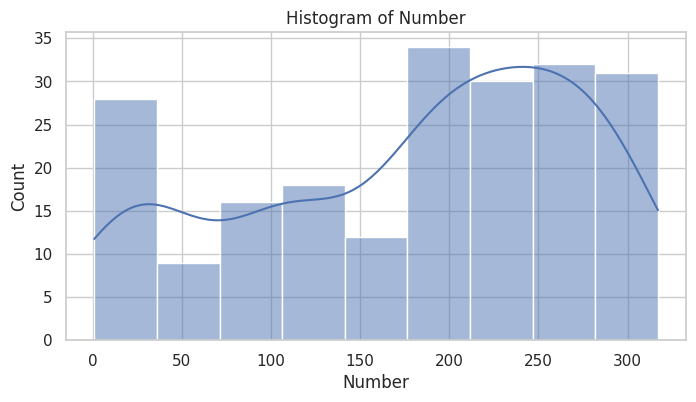

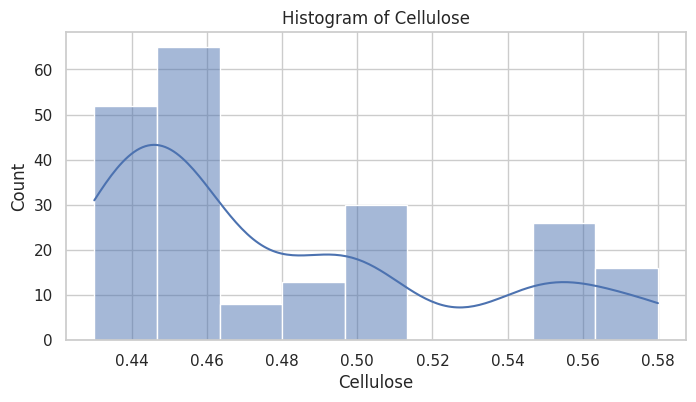

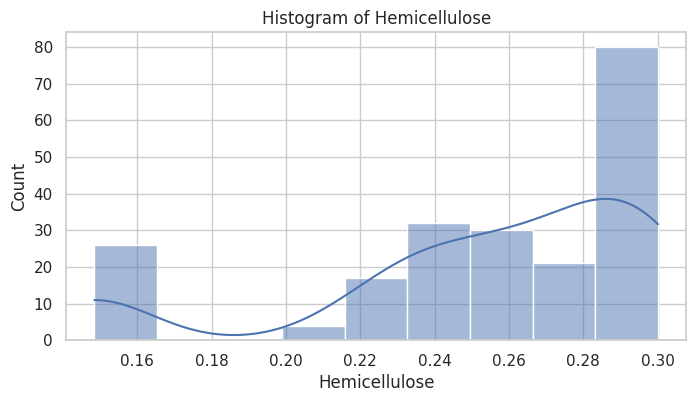

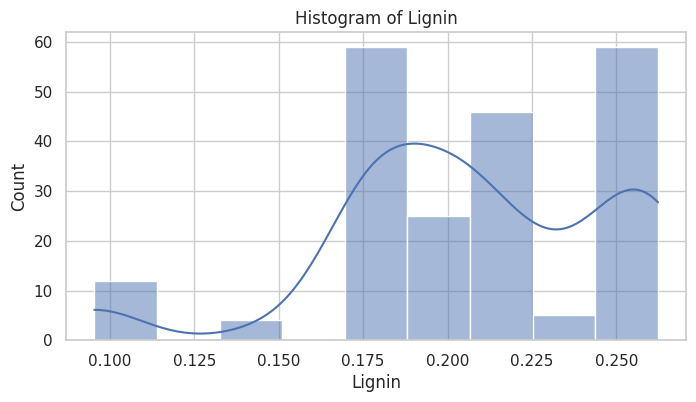

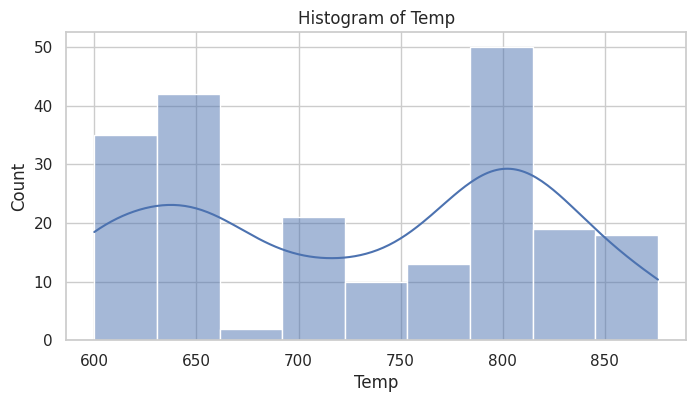

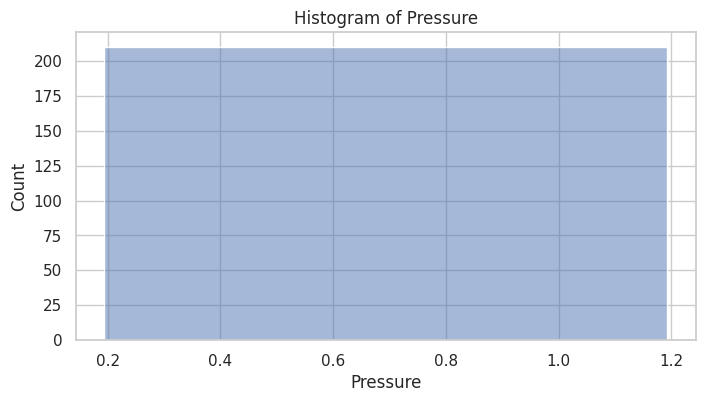

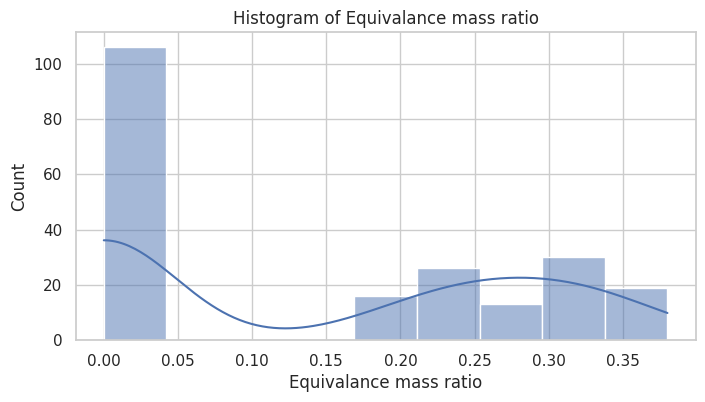

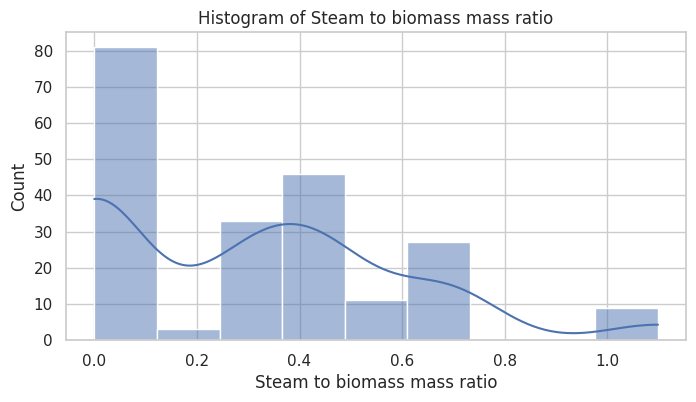

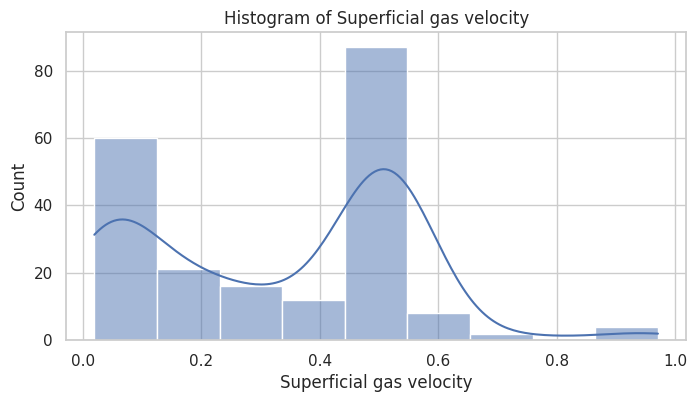

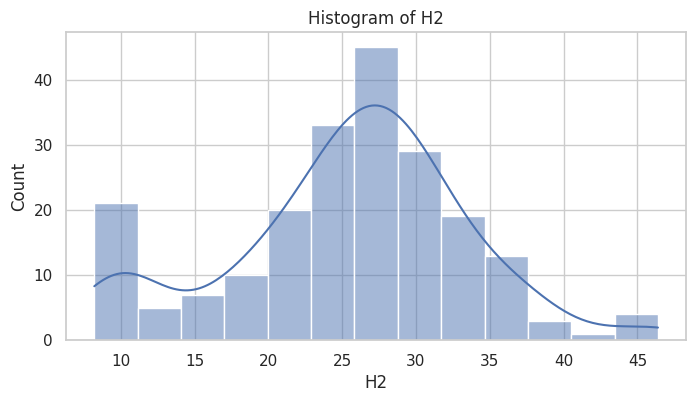

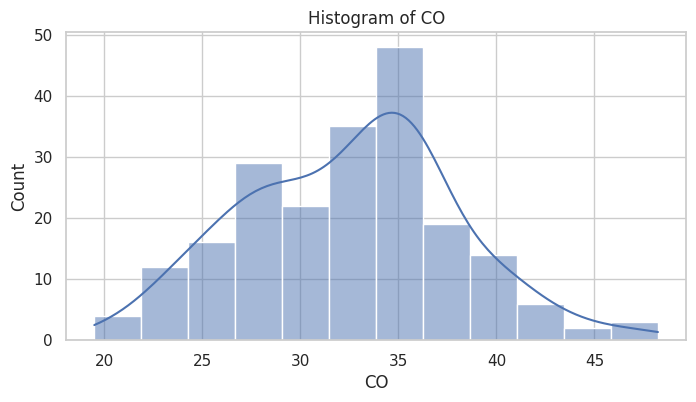

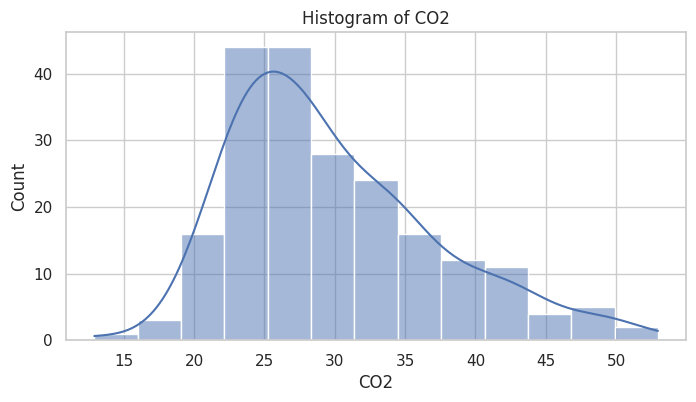

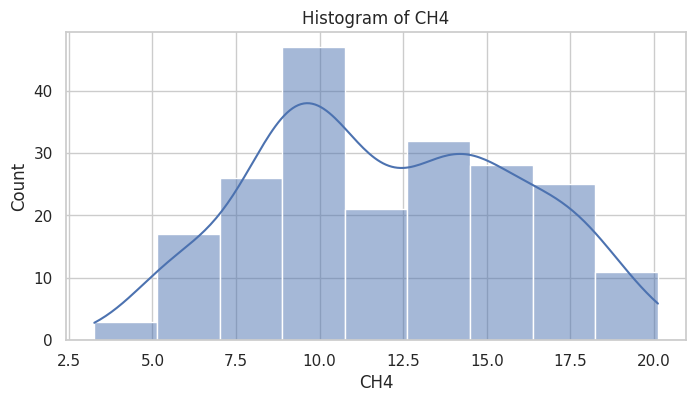

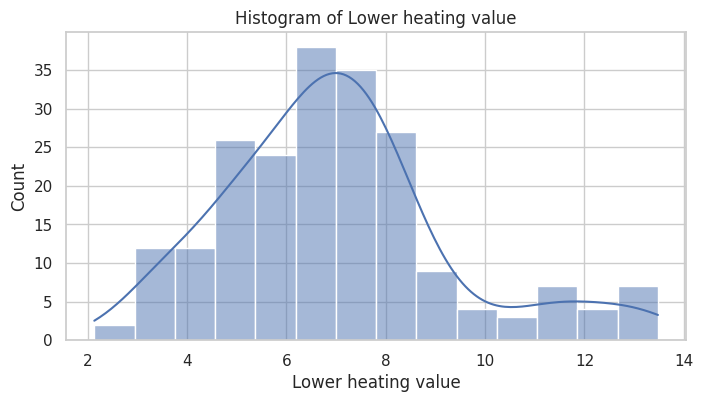

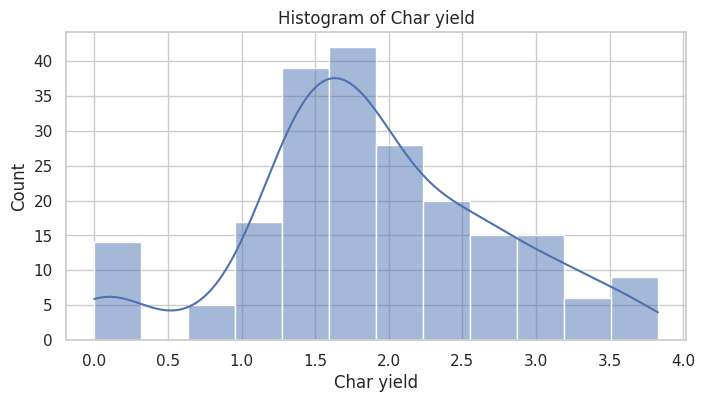

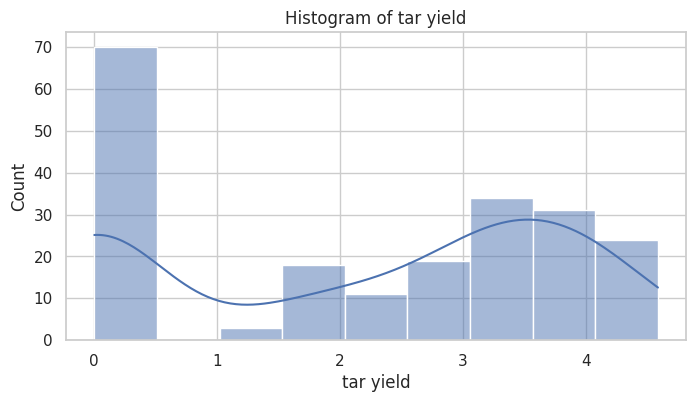

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame after preprocessing
# Replace 'df' with the name of your DataFrame

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()




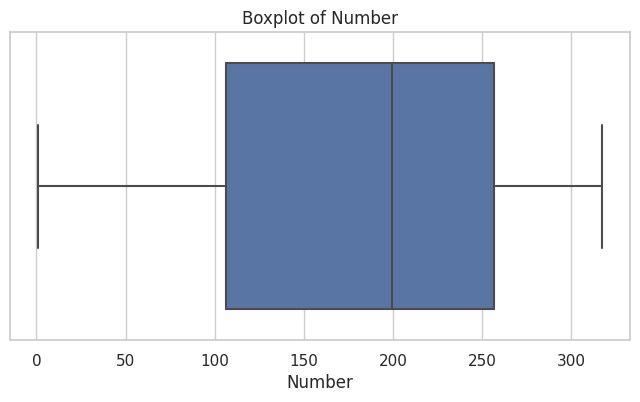

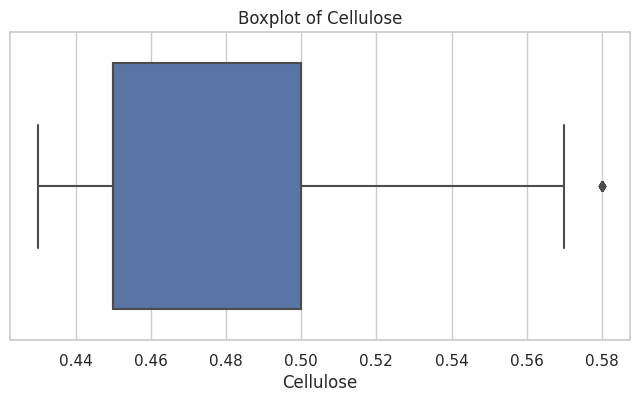

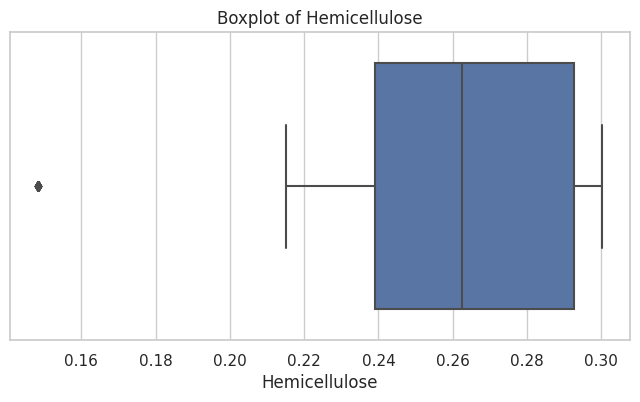

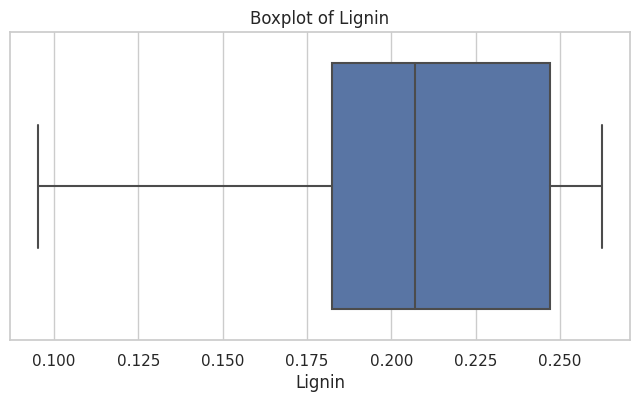

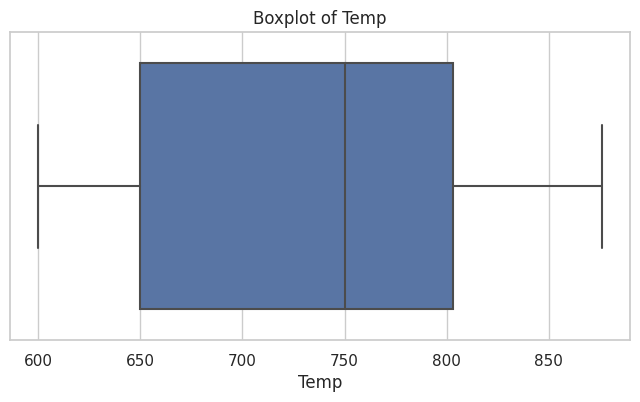

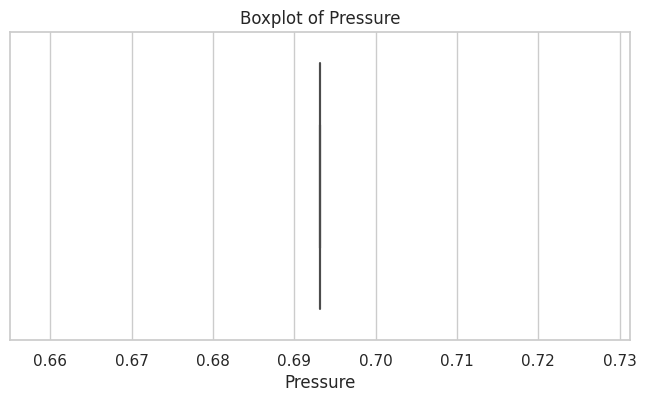

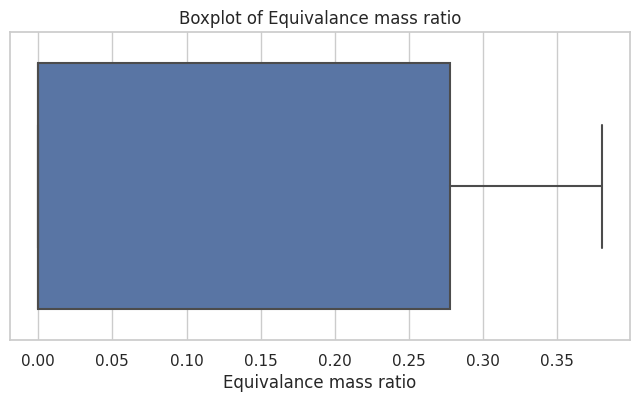

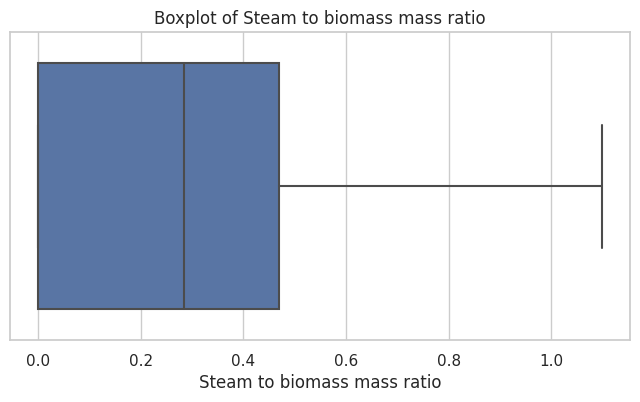

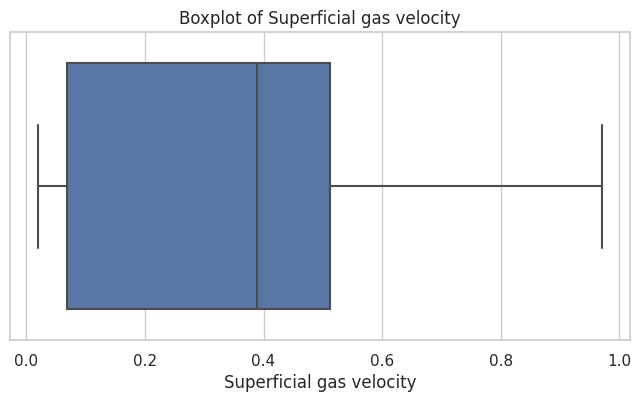

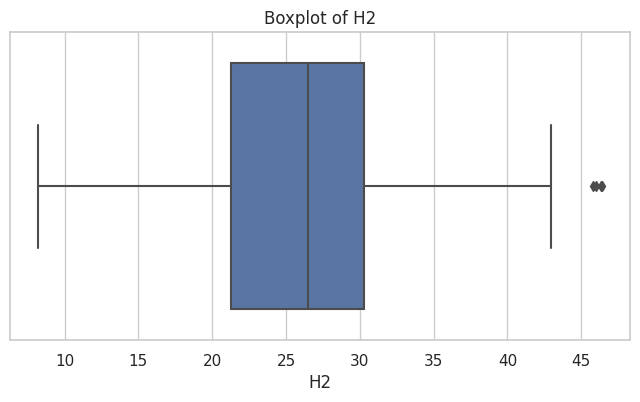

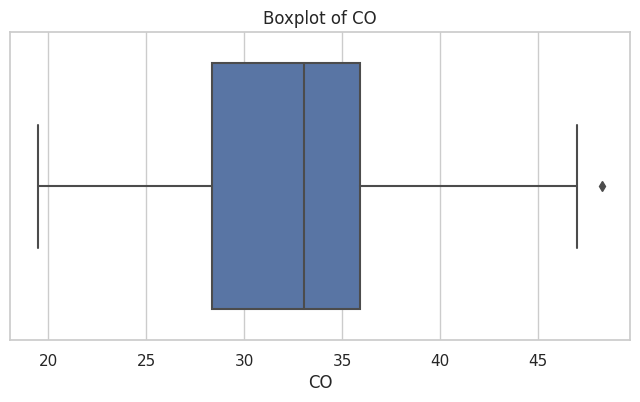

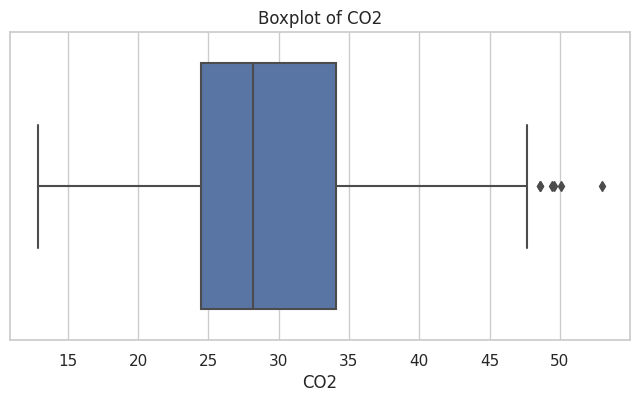

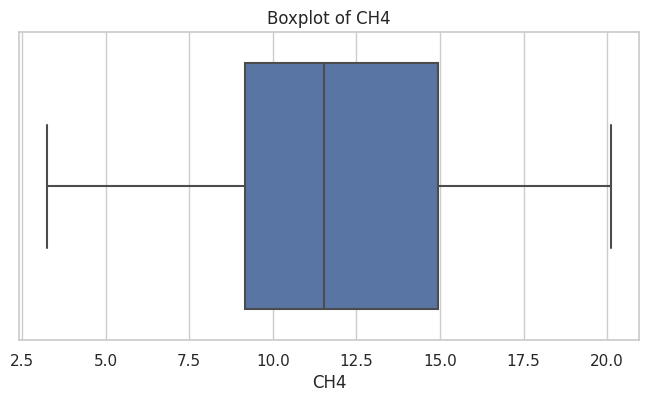

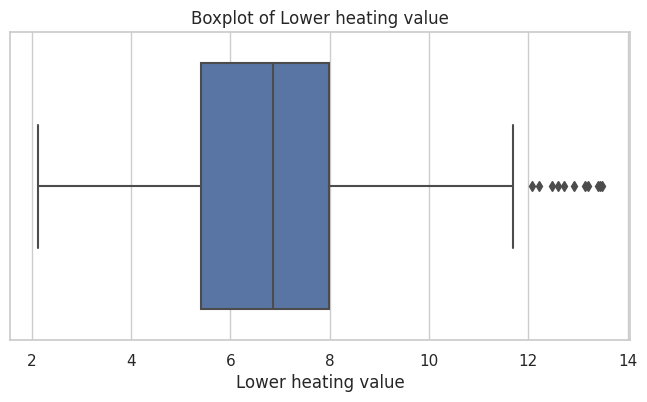

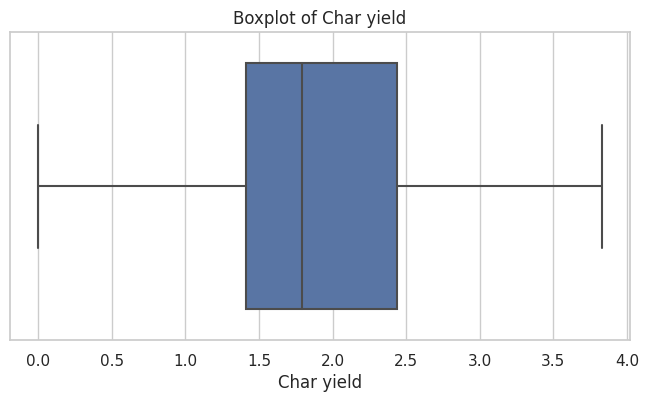

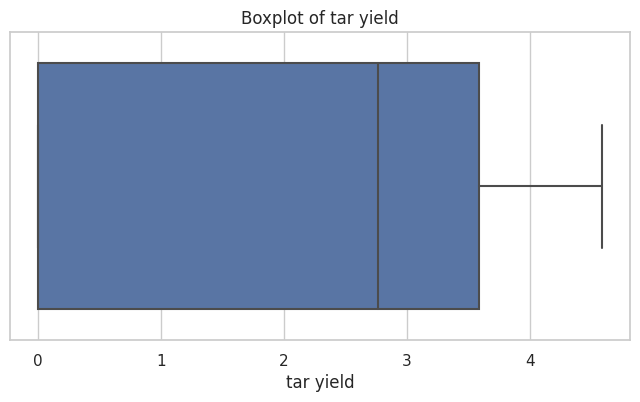

In [12]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

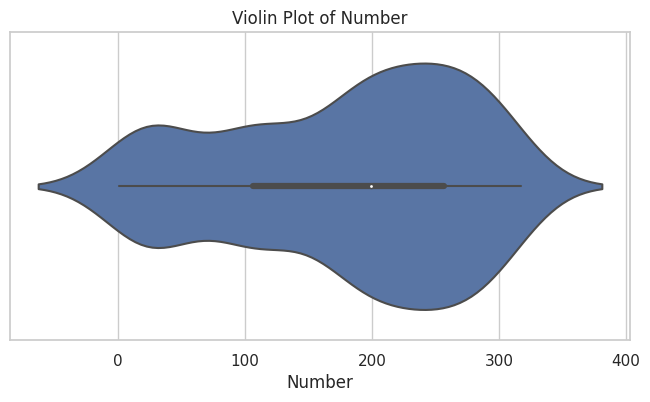

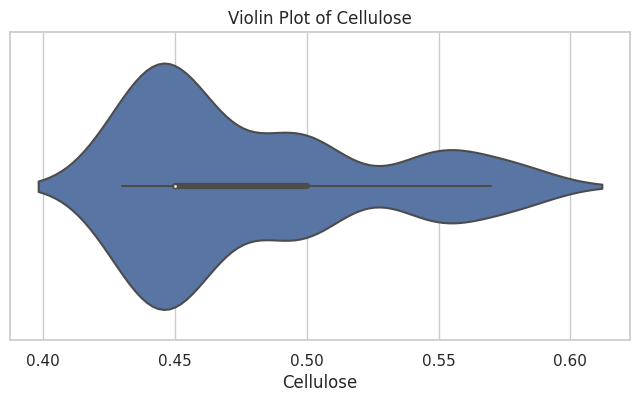

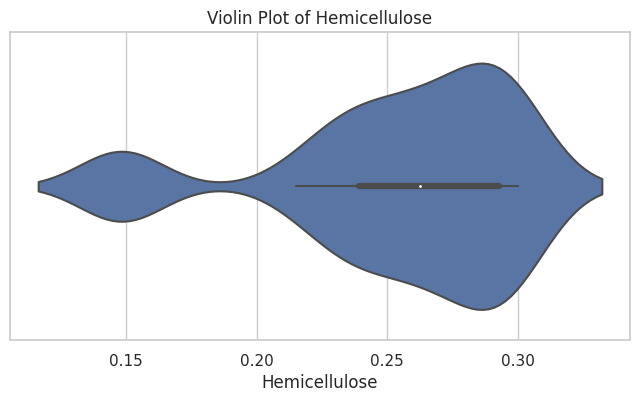

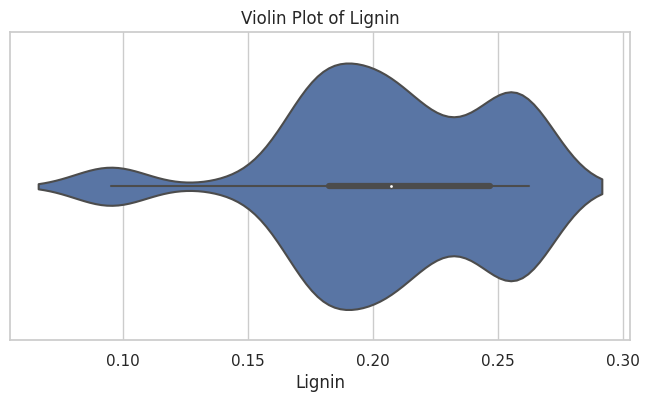

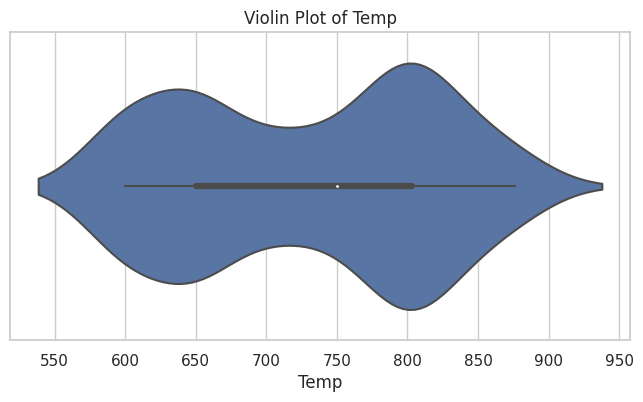

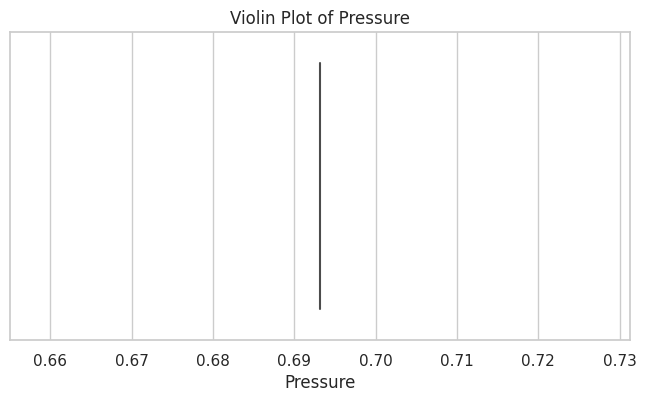

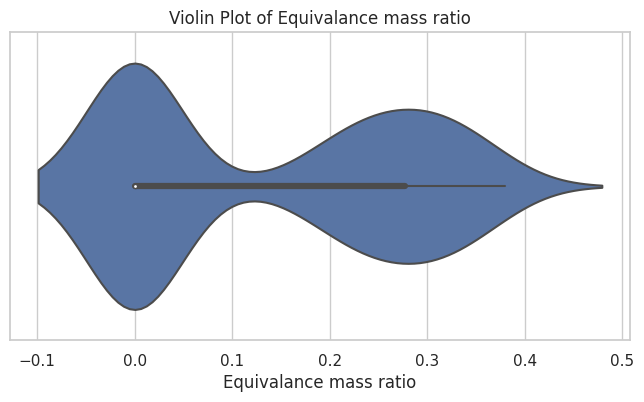

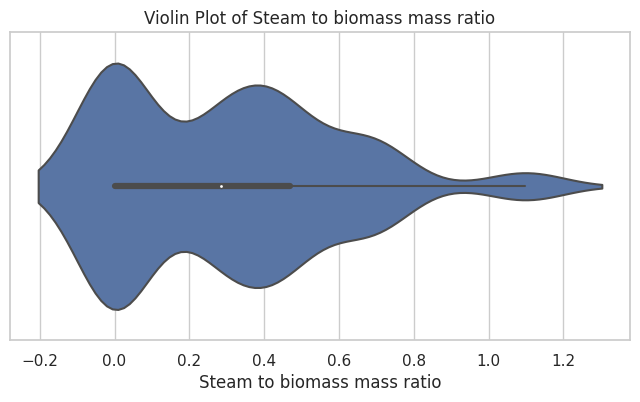

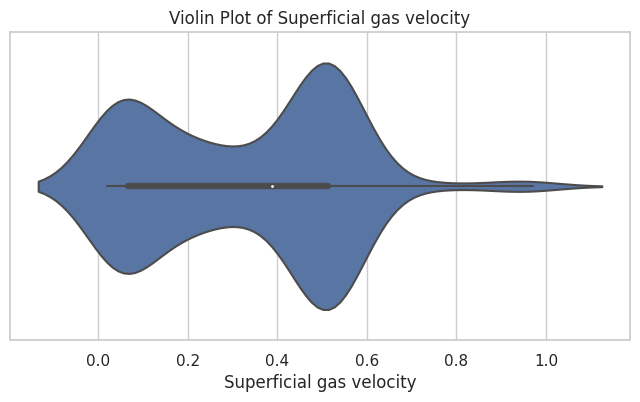

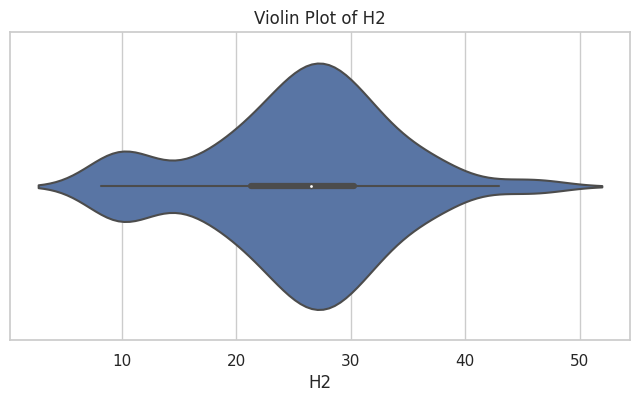

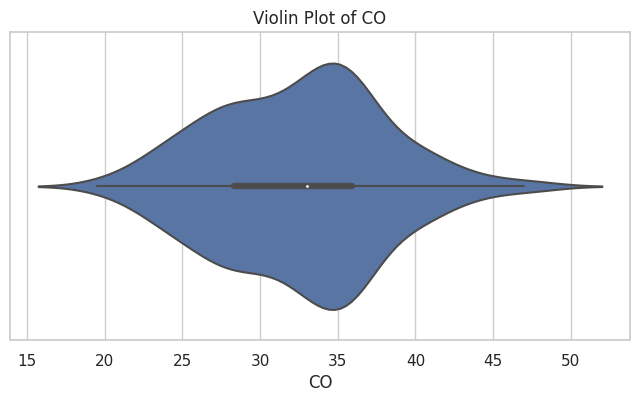

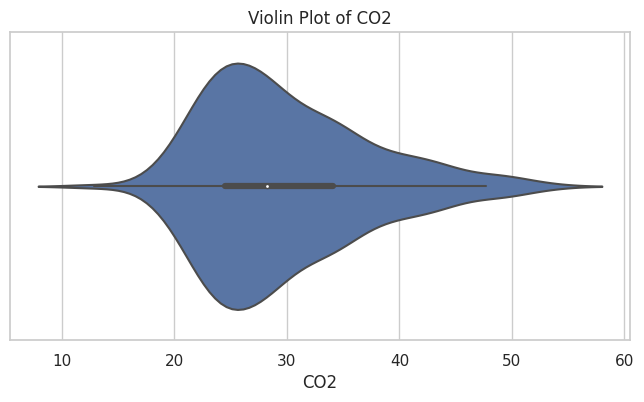

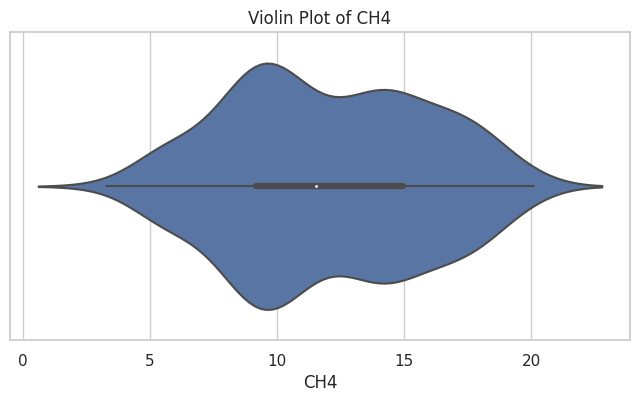

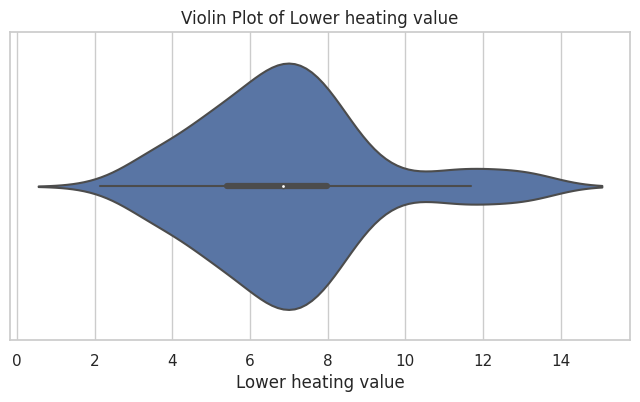

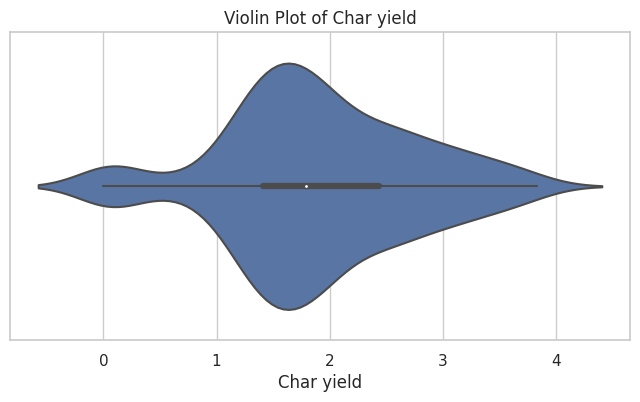

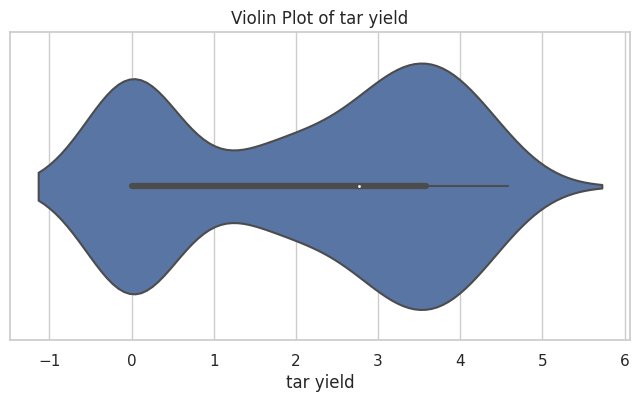

In [9]:
# Violin Plots
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()


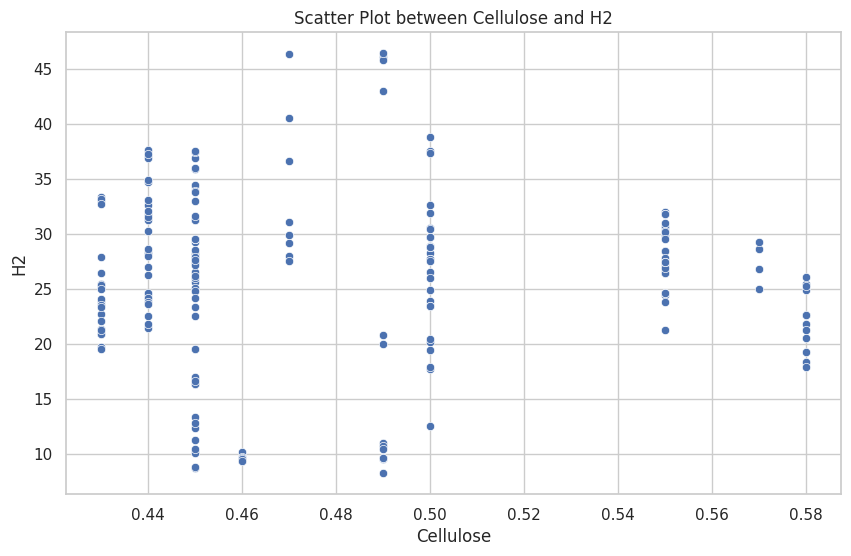

In [13]:
# Scatter Plot between Cellulose and H2
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has the columns 'Cellulose' and 'H2'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cellulose', y='H2', data=df)
plt.title('Scatter Plot between Cellulose and H2')
plt.xlabel('Cellulose')
plt.ylabel('H2')
plt.show()


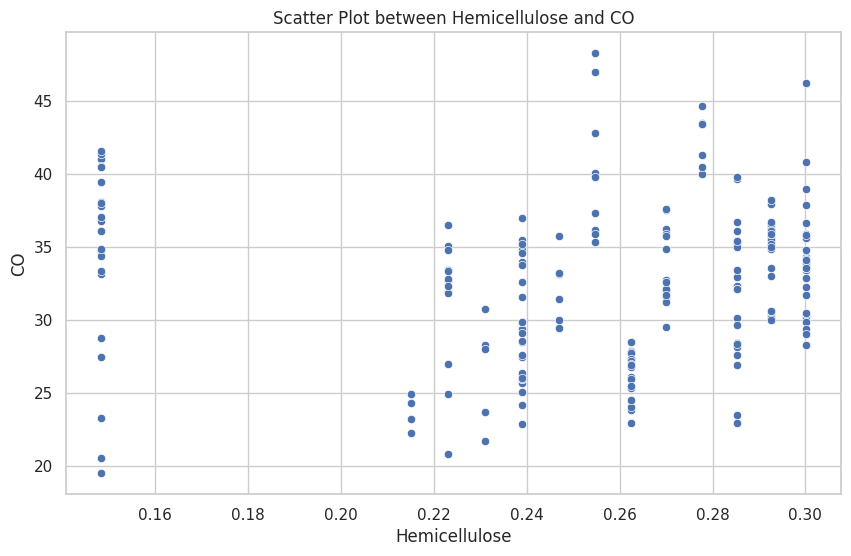

In [14]:
# Scatter Plot between Hemicellulose and CO
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hemicellulose', y='CO', data=df)
plt.title('Scatter Plot between Hemicellulose and CO')
plt.xlabel('Hemicellulose')
plt.ylabel('CO')
plt.show()


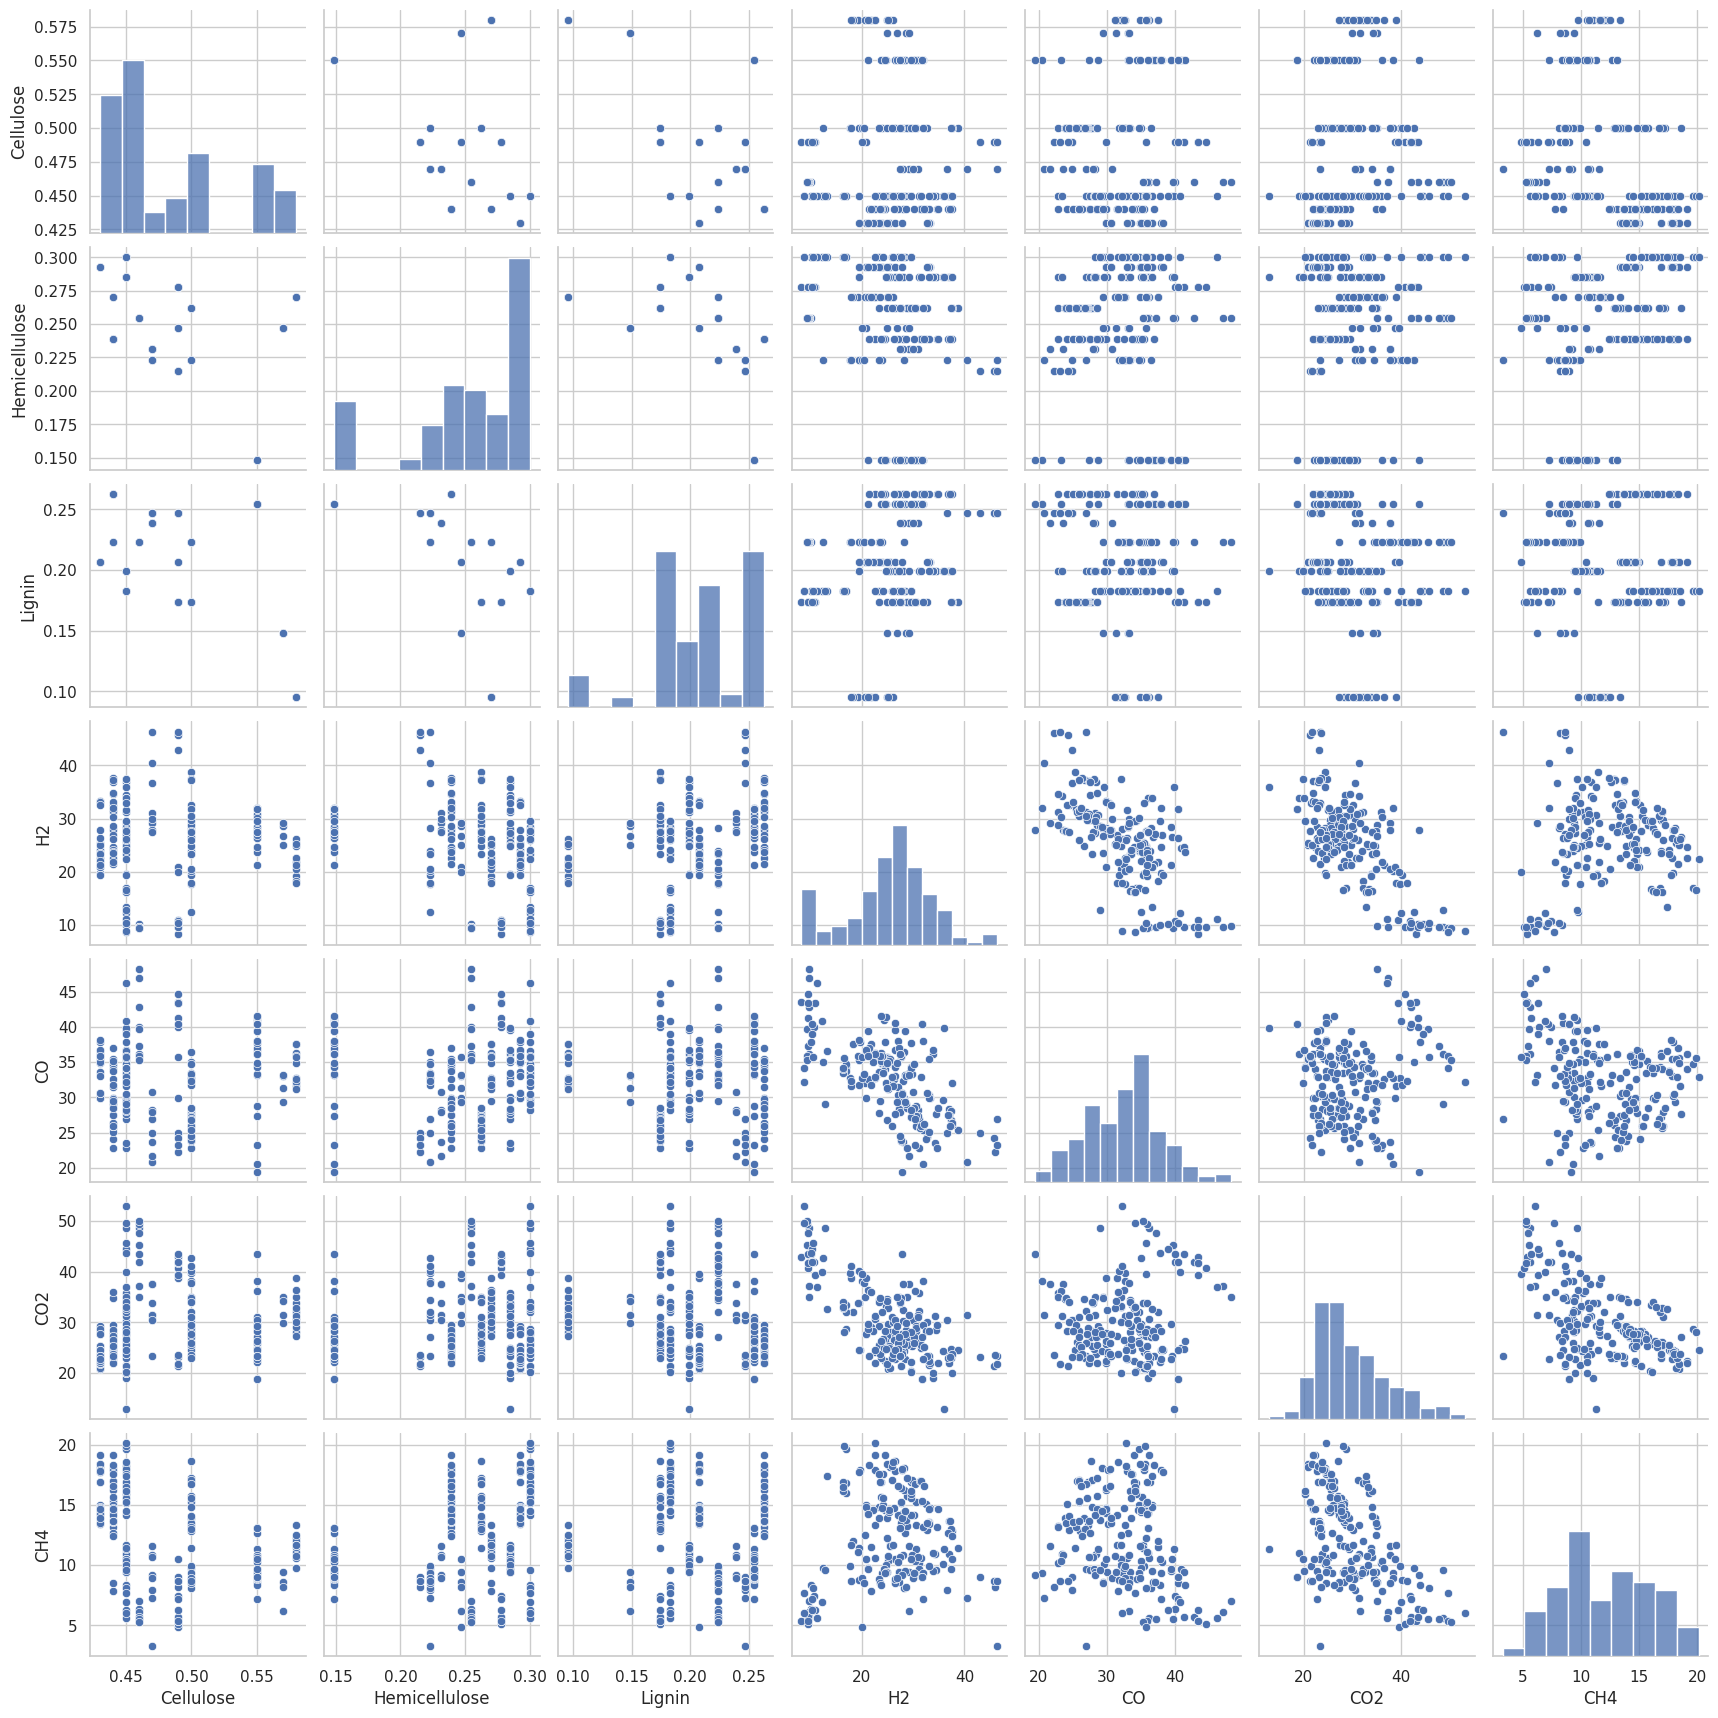

In [15]:
# Pair Plot for selected features
sns.pairplot(df[['Cellulose', 'Hemicellulose', 'Lignin', 'H2', 'CO', 'CO2', 'CH4']])
plt.show()


In [16]:
# Cross Tabulation between categorized Lower heating value and Char yield
# This is hypothetical. You would need to categorize these variables first.

# Categorizing the 'Lower heating value' and 'Char yield' into 'high' and 'low'
df['Categorized_LHV'] = pd.qcut(df['Lower heating value'], 2, labels=['low', 'high'])
df['Categorized_CharYield'] = pd.qcut(df['Char yield'], 2, labels=['low', 'high'])

cross_tab = pd.crosstab(df['Categorized_LHV'], df['Categorized_CharYield'])
print(cross_tab)


Categorized_CharYield  low  high
Categorized_LHV                 
low                     38    67
high                    70    35


<ipython-input-17-d7eddad59d8f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


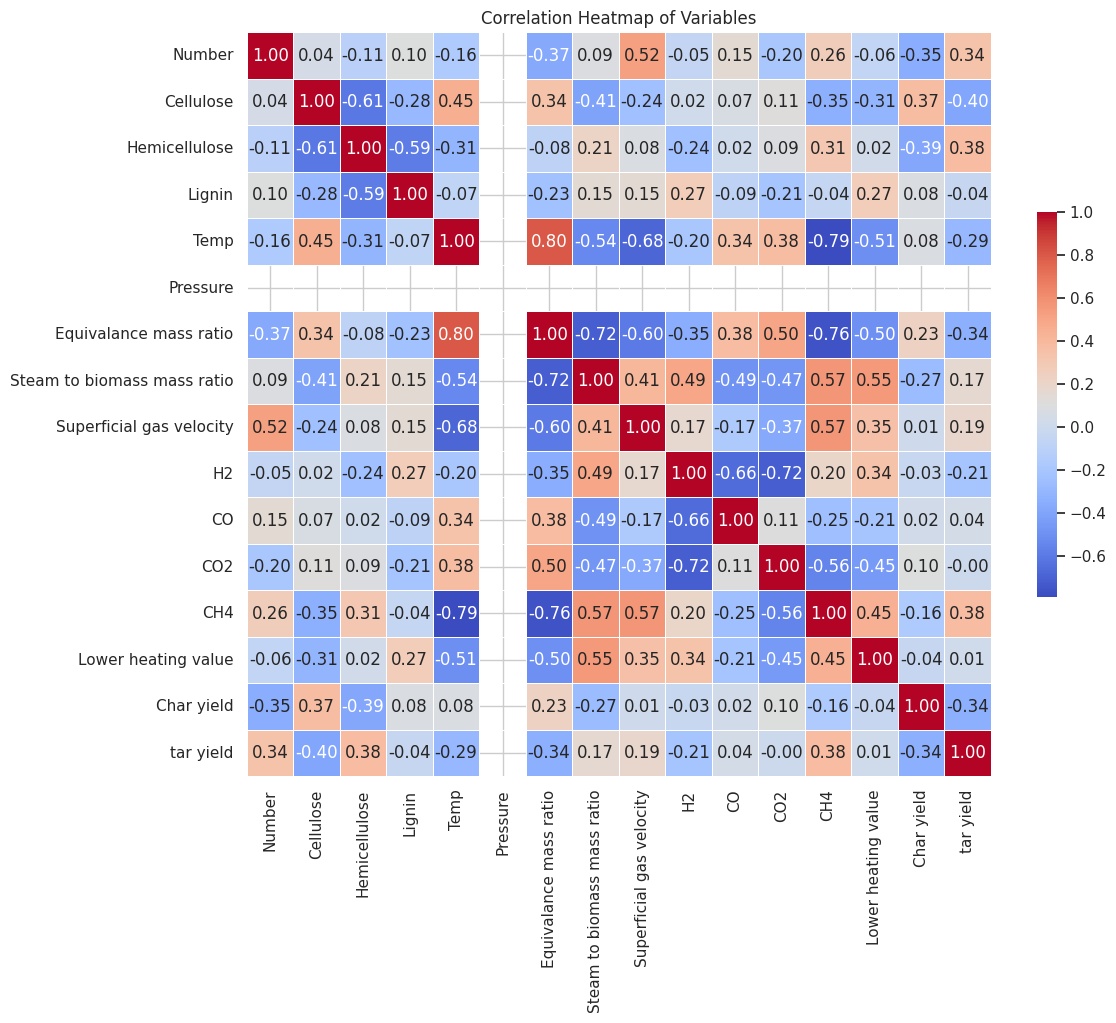

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Variables')
plt.show()


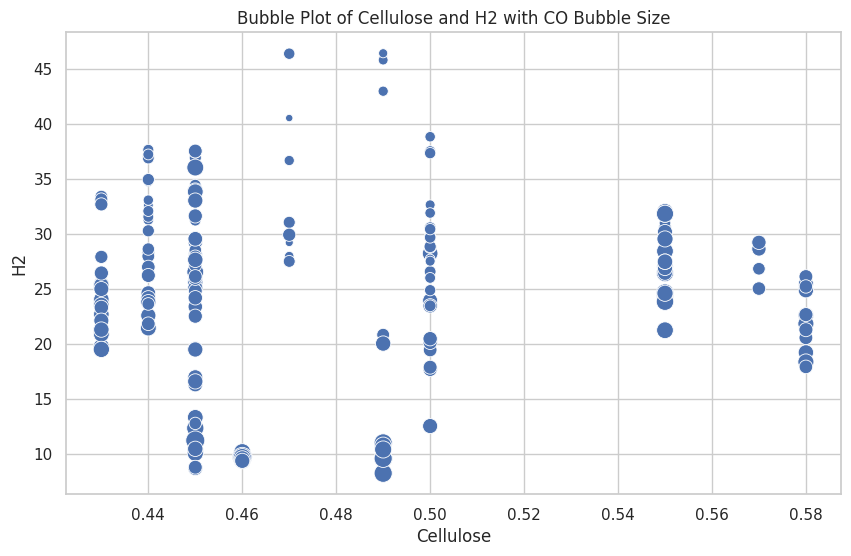

In [18]:
# Bubble Plot between Cellulose, H2, and CO
plt.figure(figsize=(10, 6))

# Assuming 'df' is your DataFrame and 'CO' values are positive. If they have negative values, you'll need to adjust them.
size = df['CO'].abs()  # Bubble sizes. Adjust as needed.

sns.scatterplot(x='Cellulose', y='H2', size=size, data=df, legend=False, sizes=(20, 200))
plt.title('Bubble Plot of Cellulose and H2 with CO Bubble Size')
plt.xlabel('Cellulose')
plt.ylabel('H2')
plt.show()


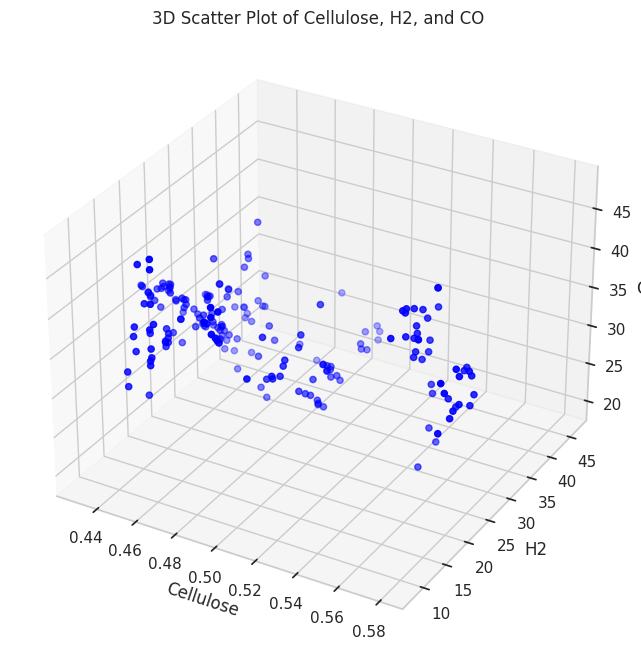

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot for Cellulose, H2, and CO
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Cellulose'], df['H2'], df['CO'], c='blue', marker='o')
ax.set_xlabel('Cellulose')
ax.set_ylabel('H2')
ax.set_zlabel('CO')

plt.title('3D Scatter Plot of Cellulose, H2, and CO')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

# Let's assume 'df' is your DataFrame and 'Lower heating value' is the column you want to predict.
# The features will then be all other columns except 'Lower heating value'.

# Define features (X) and target (y)
X = df.drop('Lower heating value', axis=1)  # features
y = df['Lower heating value']  # target variable

# Split the data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame

# Creating new features
df['Cellulose_Lignin'] = df['Cellulose'] * df['Lignin']
df['Hemicellulose_to_Cellulose'] = df['Hemicellulose'] / df['Cellulose']

# Feature selection based on correlation
# Addressing the FutureWarning by setting numeric_only=True
correlation = df.corr(numeric_only=True)
high_corr_features = correlation['Lower heating value'][abs(correlation['Lower heating value']) > 0.5].index.tolist()

# Principal Component Analysis for dimensionality reduction
# Make sure n_components is not greater than the number of features
num_features = len(high_corr_features)
n_components_pca = min(num_features, 5)  # Adjust the number of components based on the available features

pca = PCA(n_components=n_components_pca)
pca_features = pca.fit_transform(df[high_corr_features])

# Creating a DataFrame for the PCA features
df_pca = pd.DataFrame(pca_features, columns=[f'PCA_{i}' for i in range(1, n_components_pca+1)])


In [27]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Ensure that df and df_pca have the same number of rows
df_pca_aligned = df_pca.align(df, join='inner', axis=0)[0]

# Combining the original features with the PCA features
X = pd.concat([df.drop('Lower heating value', axis=1), df_pca_aligned], axis=1)
y = df['Lower heating value']  # Target variable

# Ensure that X and y have the same number of samples
if X.shape[0] == y.shape[0]:
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    raise ValueError(f"Mismatch in the number of samples: X has {X.shape[0]} rows, y has {y.shape[0]} rows")


In [29]:
# Convert categorical columns to numeric using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the training and testing sets have the same columns after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1)


In [31]:
from sklearn.impute import SimpleImputer

# Create imputers for filling missing values
# For numerical data
num_imputer = SimpleImputer(strategy='mean')

# For categorical data - assume they are already one-hot encoded so we skip this

# Apply the imputer to your encoded training and testing sets
X_train_imputed = pd.DataFrame(num_imputer.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_imputed = pd.DataFrame(num_imputer.transform(X_test_encoded), columns=X_test_encoded.columns)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data (with imputed values)
rf_model.fit(X_train_imputed, y_train)

# Evaluate the model on the testing data (with imputed values)
rf_predictions = rf_model.predict(X_test_imputed)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 1.1890548688095237


In [33]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create an SVM Regressor model
svm_model = SVR(kernel='rbf')

# Train the model on the training data (with imputed values)
svm_model.fit(X_train_imputed, y_train)

# Evaluate the model on the testing data (with imputed values)
svm_predictions = svm_model.predict(X_test_imputed)
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse}")


SVM MSE: 4.96784381072496


In [34]:
import tensorflow as tf
from tensorflow.keras import layers

# Define a simple neural network model
nn_model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_imputed.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
nn_model.fit(X_train_imputed, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the testing data
nn_predictions = nn_model.predict(X_test_imputed)
nn_mse = mean_squared_error(y_test, nn_predictions.flatten())
print(f"Neural Network MSE: {nn_mse}")


Epoch 1/10
5/5 [==============================] - 3s 120ms/step - loss: 3518.6370 - val_loss: 777.5010
Epoch 2/10
5/5 [==============================] - 0s 51ms/step - loss: 1362.6559 - val_loss: 1258.6049
Epoch 3/10
5/5 [==============================] - 0s 39ms/step - loss: 572.2742 - val_loss: 93.6195
Epoch 4/10
5/5 [==============================] - 0s 37ms/step - loss: 298.0943 - val_loss: 407.6781
Epoch 5/10
5/5 [==============================] - 0s 25ms/step - loss: 319.9453 - val_loss: 31.8216
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 65.7761 - val_loss: 152.4397
Epoch 7/10
5/5 [==============================] - 0s 28ms/step - loss: 126.8654 - val_loss: 31.1591
Epoch 8/10
5/5 [==============================] - 0s 27ms/step - loss: 23.5783 - val_loss: 53.3536
Epoch 9/10
5/5 [==============================] - 0s 26ms/step - loss: 58.1366 - val_loss: 27.2368
Epoch 10/10
2/2 [==============================] - 1s 16ms/step
Neural Network MSE: 24.62428019

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np


In [36]:
# Predictions on the test set
rf_predictions = rf_model.predict(X_test_imputed)

# R-squared and RMSE
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest R-squared: {rf_r2}")
print(f"Random Forest RMSE: {rf_rmse}")

# Cross-validation scores
rf_cv_scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores).mean()
print(f"Random Forest Cross-Validation RMSE: {rf_cv_rmse}")

Random Forest R-squared: 0.8108853258247413
Random Forest RMSE: 1.09043792524358
Random Forest Cross-Validation RMSE: 1.4565704508977113


In [38]:
# Predictions on the test set
svm_predictions = svm_model.predict(X_test_imputed)

# R-squared and RMSE
svm_r2 = r2_score(y_test, svm_predictions)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
print(f"SVM R-squared: {svm_r2}")
print(f"SVM RMSE: {svm_rmse}")

# Cross-validation scores
svm_cv_scores = cross_val_score(svm_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
svm_cv_rmse = np.sqrt(-svm_cv_scores).mean()
print(f"SVM Cross-Validation RMSE: {svm_cv_rmse}")


SVM R-squared: 0.20988325411808606
SVM RMSE: 2.228866036962509
SVM Cross-Validation RMSE: 2.0719517639792238


In [39]:
# Predictions on the test set
nn_predictions = nn_model.predict(X_test_imputed).flatten()

# R-squared and RMSE
nn_r2 = r2_score(y_test, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
print(f"Neural Network R-squared: {nn_r2}")
print(f"Neural Network RMSE: {nn_rmse}")

# Cross-validation is not as straightforward with Keras models,
# and typically involves creating a wrapper for the Keras model to use with scikit-learn's cross_val_score.
# However, the validation_split in model.fit can provide an estimate of model performance during training.


2/2 [==============================] - 0s 11ms/step
Neural Network R-squared: -2.9163985184325667
Neural Network RMSE: 4.96228578363898


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_rf.fit(X_train_imputed, y_train)

# Best parameters
print("Best parameters found: ", grid_search_rf.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import expon, reciprocal

# Define the parameter distribution for SVM
param_distr_svm = {
    'C': reciprocal(0.001, 1000),
    'gamma': expon(scale=1.0)
}

# Create a base model
svm = SVR()

# Instantiate the randomized search model
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_distr_svm,
                                       n_iter=10, cv=3, verbose=2, random_state=42,
                                       scoring='neg_mean_squared_error')

# Fit the randomized search model
random_search_svm.fit(X_train_imputed, y_train)

# Best parameters
print("Best parameters found: ", random_search_svm.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......C=0.1767016940294795, gamma=3.010121430917521; total time=   0.0s
[CV] END ......C=0.1767016940294795, gamma=3.010121430917521; total time=   0.0s
[CV] END ......C=0.1767016940294795, gamma=3.010121430917521; total time=   0.0s
[CV] END .....C=24.658329458549105, gamma=0.9129425537759532; total time=   0.0s
[CV] END .....C=24.658329458549105, gamma=0.9129425537759532; total time=   0.0s
[CV] END .....C=24.658329458549105, gamma=0.9129425537759532; total time=   0.0s
[CV] END ..C=0.008632008168602538, gamma=0.16959629191460518; total time=   0.0s
[CV] END ..C=0.008632008168602538, gamma=0.16959629191460518; total time=   0.0s
[CV] END ..C=0.008632008168602538, gamma=0.16959629191460518; total time=   0.0s
[CV] END ...C=0.002231010801867922, gamma=2.0112308644799395; total time=   0.0s
[CV] END ...C=0.002231010801867922, gamma=2.0112308644799395; total time=   0.0s
[CV] END ...C=0.002231010801867922, gamma=2.0112